# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1**   - Vyankat B Hambarde

# **Project Summary -**

The aim of this project was to use machine learning methods to forecast the risk of coronary heart disease (CHD) in patients over the next 10 years. The researchers used data from an ongoing cardiovascular study conducted on residents of Framingham, Massachusetts. The dataset contained details of more than 4,000 patients and had 15 different attributes, each representing a possible factor contributing to the risk of CHD. These attributes covered information about the patients' demographics, behaviors, and medical conditions that could affect the likelihood of developing coronary heart disease.

Before analyzing the data, data preprocessing has been done. It involved cleaning and changing the data to make it easier to work with. One important step was dealing with missing values, where some information was not available for some patients. Different techniques were used to estimate these missing values, such as using the middle value (median) of similar data, the most common value (mode), or a method called KNN imputation. Outliers, which are unusual or extreme values that could affect the analysis, were also identified and removed from the data. This was done using a method called Interquartile Range (IQR). To improve the accuracy of the analysis, certain continuous variables that were unevenly distributed were transformed. For example, they were changed using mathematical functions like logarithms or square roots to make the data more balanced and easier to work with.

To ensure that the chosen features are not highly related to each other (reducing redundancy), a method called variance inflation factor was used to detect and remove multicollinearity. Multicollinearity occurs when some features are highly correlated, making it challenging for the model to distinguish their individual effects.

Additionally, a new feature named "pulse pressure" was created to capture the relationship between systolic and diastolic blood pressure. This newly derived feature can be valuable in understanding the impact of blood pressure on CHD risk. After the feature selection process, some columns that were found to be redundant were removed to simplify the dataset and avoid unnecessary complexity.
The most important features, based on their impact on predicting CHD risk, were identified as 'age', 'sex', 'education', 'cigs_per_day', 'bp_meds' (blood pressure medications usage), 'prevalent_stroke', 'prevalent_hyp' (prevalent hypertension), 'diabetes', 'total_cholesterol', 'bmi' (body mass index), 'heart_rate', 'glucose', and 'pulse_pressure'. These selected features can be used to build a more effective model to predict the risk of coronary heart disease in patients based on the dataset.

In this project, the dataset was imbalanced, meaning there were more examples of one class (patients without CHD risk) than the other class (patients with CHD risk). To address this issue, a combination of two techniques, SMOTE (Synthetic Minority Over-sampling Technique) and Tomek links undersampling, was used. This balanced the class distribution and improved the model's performance.

To ensure that all features had the same scale and to avoid any bias towards specific features, the data was scaled using the standard scalar method. Several machine learning models were tested to see how well they performed in predicting CHD risk. The main evaluation metric used was "recall," which measures the ability of the model to correctly identify patients with CHD risk. After thorough analysis, the Neural Network model, which was fine-tuned for better performance, was selected as the final prediction model. It had the highest recall score among all the evaluated models. By prioritizing a high recall score, the aim was to correctly identify as many patients at risk of CHD as possible, even if it meant having some false positives. Overall, the project demonstrated the potential of machine learning to accurately predict CHD risk in patients based on data from a cardiovascular study. Through careful data preprocessing, feature selection, and model evaluation, it was possible to achieve positive results by effectively predicting CHD risk in patients.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The dataset used in this study is from an ongoing cardiovascular study conducted on residents of Framingham, Massachusetts. The main objective is to predict whether a patient has a 10-year risk of developing coronary heart disease (CHD). The dataset contains information on more than 4,000 patients and includes 15 attributes, each representing a potential risk factor for CHD. These attributes cover various aspects, including demographic information, behaviors, and medical factors that could influence the risk of developing coronary heart disease.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [160]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt # For Manupulation of data



import seaborn as sns
import matplotlib.pyplot as plt  # For Visualization of data
%matplotlib inline

from sklearn.impute import KNNImputer     # For imputation of missing values
from sklearn.feature_selection import chi2 # Feature selection

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report # evaluation metric for classofication algo

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold # above all For meachine learning work
import xgboost as xgb

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [161]:
from google.colab import drive
drive.mount('/content/drive') # Load Dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [162]:
link = "/content/drive/MyDrive/AlmaBetter/ML Project/data_cardiovascular_risk.csv"
CvRP_df = pd.read_csv(link)

### Dataset First View

In [163]:
# Dataset First Look
df = CvRP_df.copy()
df

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0  

[3390 rows x 17 columns]

### Dataset Rows & Columns count

In [164]:
# Dataset Rows & Columns count
df.shape[1],df.shape[0] # cheking the sahpe of data set i.e. No of rows and columns

         # There are 17 columns and 3390 rows in the dataset.

(17, 3390)

### Dataset Information

In [165]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

* df.info() Function gives the overall info of dataset which contains columns name, no of columns, datatype of columns and non null counts of entry in the form of dataframe.
* This data set has float64-9, int64-6-, object-2 i.e 17 columns with 3390 rows.

#### Duplicate Values

In [166]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [167]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

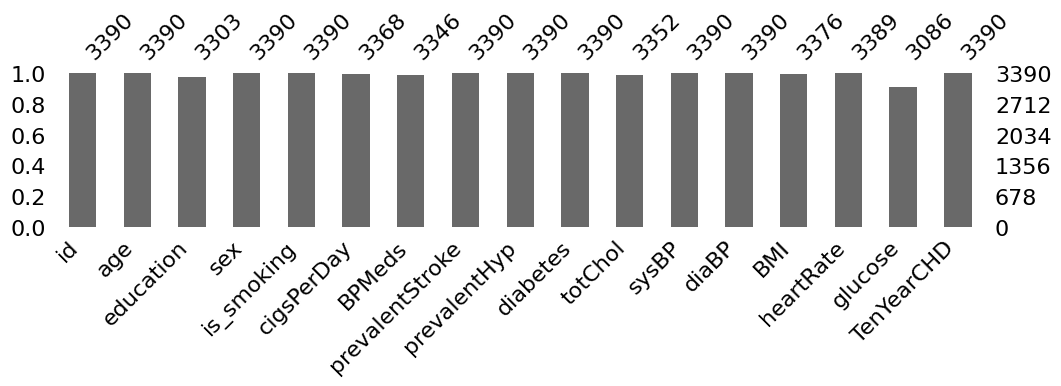

In [168]:
# Visualizing the missing valuesimport missingno as msno # this library can be used to check missing values in df
import missingno as msno # this library can be used to check missing values in df
msno.bar(df,figsize=(12,2)) # By using bar graph we cna visuvalize the missing values in dataset and in this dataset no null values are there

In [169]:
nan_cols = [i for i in df.columns if df[i].isnull().sum() > 0]
nan_cols

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

<Axes: >

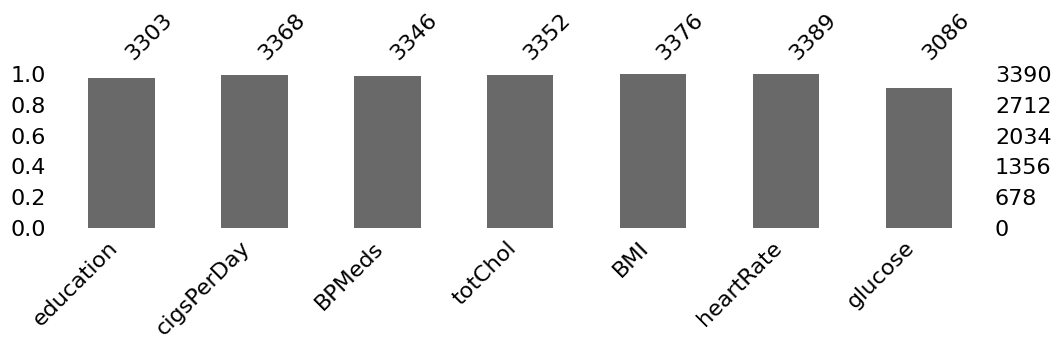

In [170]:
# Visualizing the missing values
import missingno as msno # this library can be used to check missing values in df
msno.bar(df[nan_cols],figsize=(12,2)) # By using bar graph we cna visuvalize the missing values in dataset and in this dataset no null values are there.

### What did you know about your dataset?

After performing various opearation on the dattset, till now follwing are the some observation can be made about the dataset.

Dataset has 17 columns and 3390 rows.

Among the 17 columns the datatypes of the columns are float64-9, int64-6-, object-2.

The dataset has missing values in the columns education, cigs per day, BP meds, totChol, BMI, heart rate and glucose.

There are no duplicated columns but various columns may have duplcated vales.

## ***2. Understanding Your Variables***

In [171]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [172]:
# Dataset Describe
df.describe() # used to generate descriptive statistics for a DataFrame. all for both catagorical and numerical values

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

### Variables Description

The dataset includes various features related to patients' health and lifestyle like Demographic,Behavioral,Medical history and current condition and one dependent variable. Again each row of these data contains a unique patient and includes attributes such as age, sex, general health, checkup frequency, exercise habits, and smoking history.

**Demographic:**

1. **Sex:** male or female ("M" or "F")
2. **Age:** Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
3. **Education:** The level of education of the patient (categorical values - 1,2,3,4)

**Behavioral:**

1. **is_smoking:** whether or not the patient is a current smoker ("YES" or "NO")
2. **Cigs Per Day:** the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical history:**

1. **BP Meds:** whether or not the patient was on blood pressure medication (Nominal)
2. **Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal)
3. **Prevalent Hyp:** whether or not the patient was hypertensive (Nominal)
Diabetes: whether or not the patient had diabetes (Nominal)

**Medical current condition:**

1. **Tot Chol:** total cholesterol level (Continuous)
2. **Sys BP:** systolic blood pressure (Continuous)
3. **Dia BP:** diastolic blood pressure (Continuous)
4. **BMI:** Body Mass Index (Continuous)
5. **Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
6. **Glucose:** glucose level (Continuous)

**Dependent variable (Target Variable):** 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

### Check Unique Values for each variable.

In [173]:
# Check Unique Values for each variable.
for column in df.columns: # By using for loop we can iterate through the dataframe to get unique values from each column.
  print(f"{df[column].nunique()} Unique values are in column {column} and their percentage is \n {(df[column].nunique()/len(df))*100}'%'.")

3390 Unique values are in column id and their percentage is 
 100.0'%'.
39 Unique values are in column age and their percentage is 
 1.1504424778761062'%'.
4 Unique values are in column education and their percentage is 
 0.11799410029498525'%'.
2 Unique values are in column sex and their percentage is 
 0.058997050147492625'%'.
2 Unique values are in column is_smoking and their percentage is 
 0.058997050147492625'%'.
32 Unique values are in column cigsPerDay and their percentage is 
 0.943952802359882'%'.
2 Unique values are in column BPMeds and their percentage is 
 0.058997050147492625'%'.
2 Unique values are in column prevalentStroke and their percentage is 
 0.058997050147492625'%'.
2 Unique values are in column prevalentHyp and their percentage is 
 0.058997050147492625'%'.
2 Unique values are in column diabetes and their percentage is 
 0.058997050147492625'%'.
240 Unique values are in column totChol and their percentage is 
 7.079646017699115'%'.
226 Unique values are in colum

## 3. ***Data Wrangling***

Some names of the variables are not relevant and not easy to understand. Some data may have data entry errors, and some variables may need data type conversion and we need to fix this issue in the data and this is reffered as the "Data Wrangling" process.

This need to be done before EDA as it will help to perform EDA effectively.

### Data Wrangling Code

In [174]:
# Write your code to make your dataset analysis ready.
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [175]:
df.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds','prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp','BMI':'bmi','heartRate':'heart_rate',
                   'TenYearCHD':'ten_year_chd'},inplace = True) # Renaming the column those who are inappropriate name
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigs_per_day',
       'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes',
       'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate',
       'glucose', 'ten_year_chd'],
      dtype='object')

In [176]:
cat_col = [i for i in df.columns if df[i].nunique()<=4]
cont_col = [i for i in df.columns if i not in cat_col] # identifying the numerical and categorical columns
print(f"List of Categorical columns {cat_col} \nList of Continiouse columns {cont_col}") # ten_year_chd is dependent variable.

List of Categorical columns ['education', 'sex', 'is_smoking', 'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'ten_year_chd'] 
List of Continiouse columns ['id', 'age', 'cigs_per_day', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']


### What all manipulations have you done and insights you found?

As part of making the data easier to work with, we have renamed all the columns in the dataset. Additionally, we have identified and categorized the different types of variables to simplify the process of plotting graphs.

By renaming columns and categorizing variables, we can easily navigate and analyze the dataset, and plotting graphs becomes a more straightforward task, making the overall analysis process more efficient and intuitive.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Visualization of Dependent Variable (ten_year_chd) {Univariate A}

In [177]:
# Chart - 1 visualization code
print("Total no. of coronary heart disease :", df.ten_year_chd.count())
per_chd = (df[df['ten_year_chd']==True].ten_year_chd.count())/df.ten_year_chd.count()*100 # % of total customers churning
print(f"Percentage of having coronary heart disease : {round(per_chd,2)}%")

Total no. of coronary heart disease : 3390
Percentage of having coronary heart disease : 15.07%


In [178]:
CHD_Y = pd.DataFrame(df['ten_year_chd'].value_counts())
CHD_Y['CHD Rate'] = round(CHD_Y*100/len(df),2) # Check for how many customer leave the company (Churn)
CHD_Y

ten_year_chd  CHD Rate
0          2879     84.93
1           511     15.07

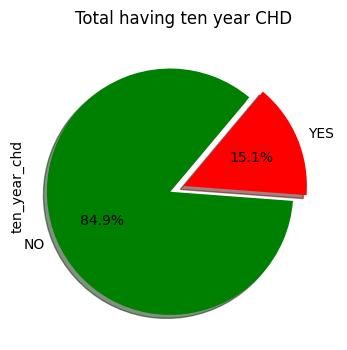

In [179]:
df['ten_year_chd'].value_counts().plot( kind='pie',figsize=(12,4),autopct="%1.1f%%",startangle=50,shadow=True,
labels=['NO','YES'], colors=['green','red'],explode=[0.12,0])
plt.title('Total having ten year CHD')   # Dependent Variable Column Visualization
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are a type of graph that show how parts of a whole relate to each other. They are useful when you want to display data that represents percentages or proportions in an easy-to-understand and visually appealing way.

##### 2. What is/are the insight(s) found from the chart?

From the chart we can conclude that Out of these 3,390 records, 511 records (approximately 15.1%) are classified as positive for 10-year CHD risk, the remaining 2,879 records (approximately 84.9%) are classified as negative for 10-year CHD risk, indicating that they are predicted to have a lower risk or no risk of developing coronary heart disease in the next 10 years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This distribution of positive and negative cases is essential in understanding the class balance of the dataset, which is crucial for evaluating the performance of machine learning models, especially in cases where the classes are imbalanced.

#### Chart - 2

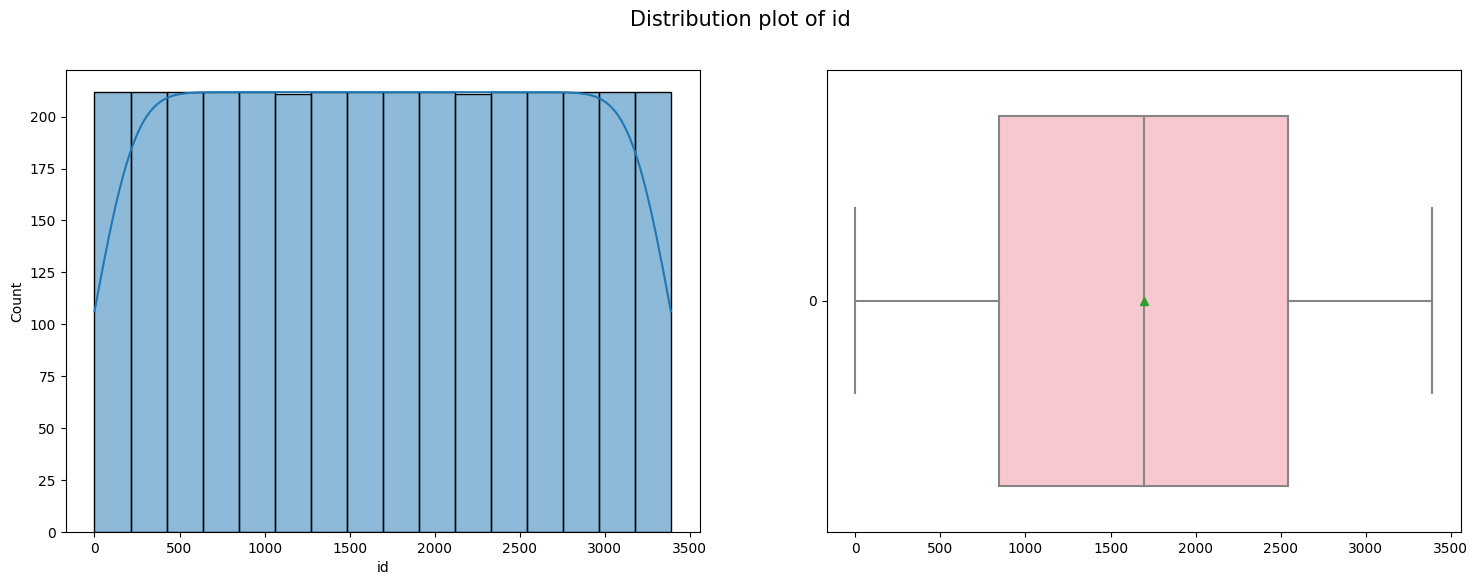

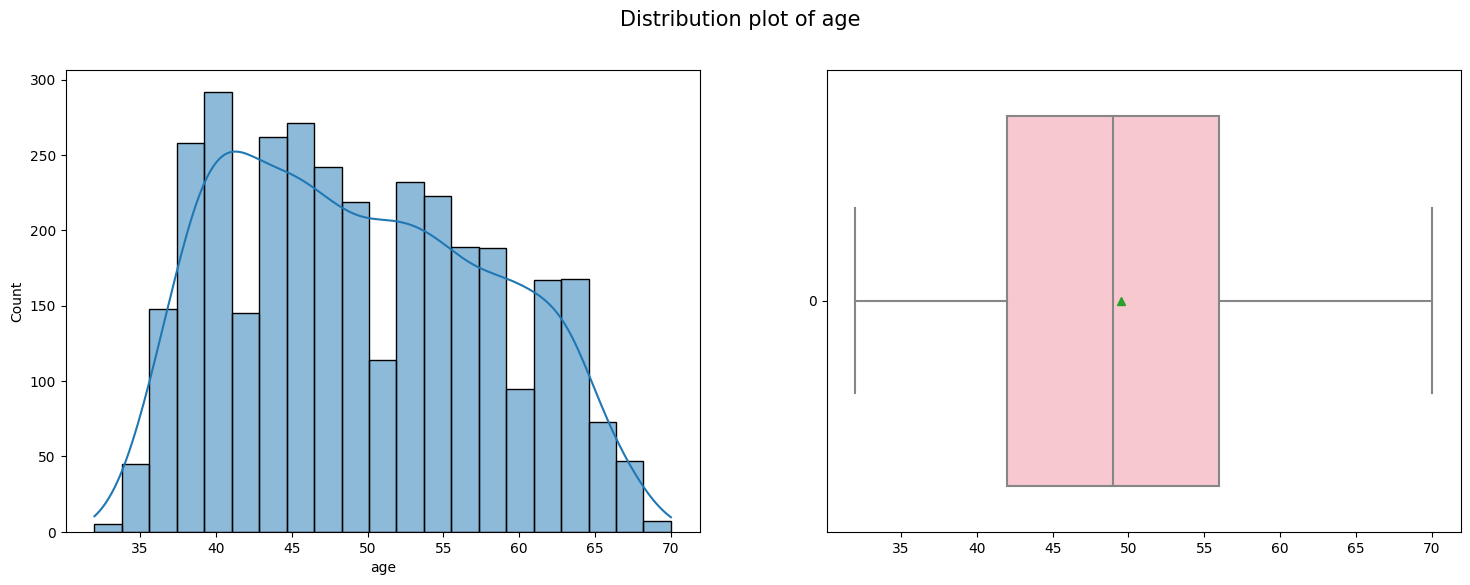

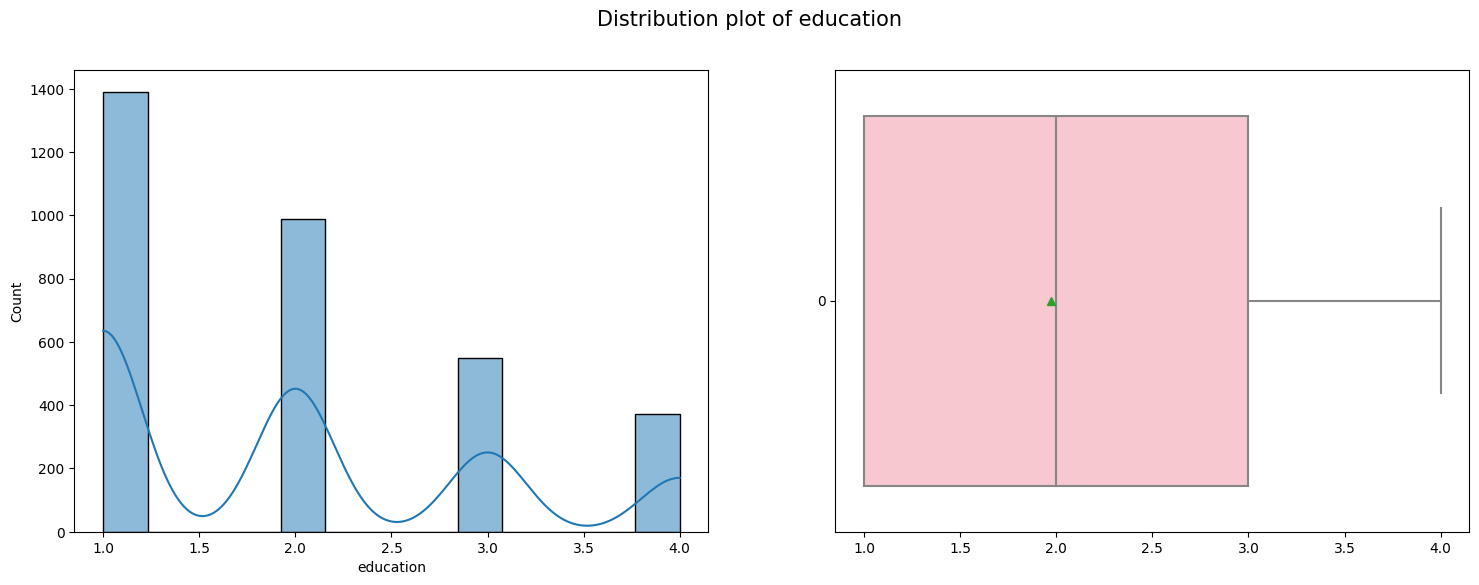

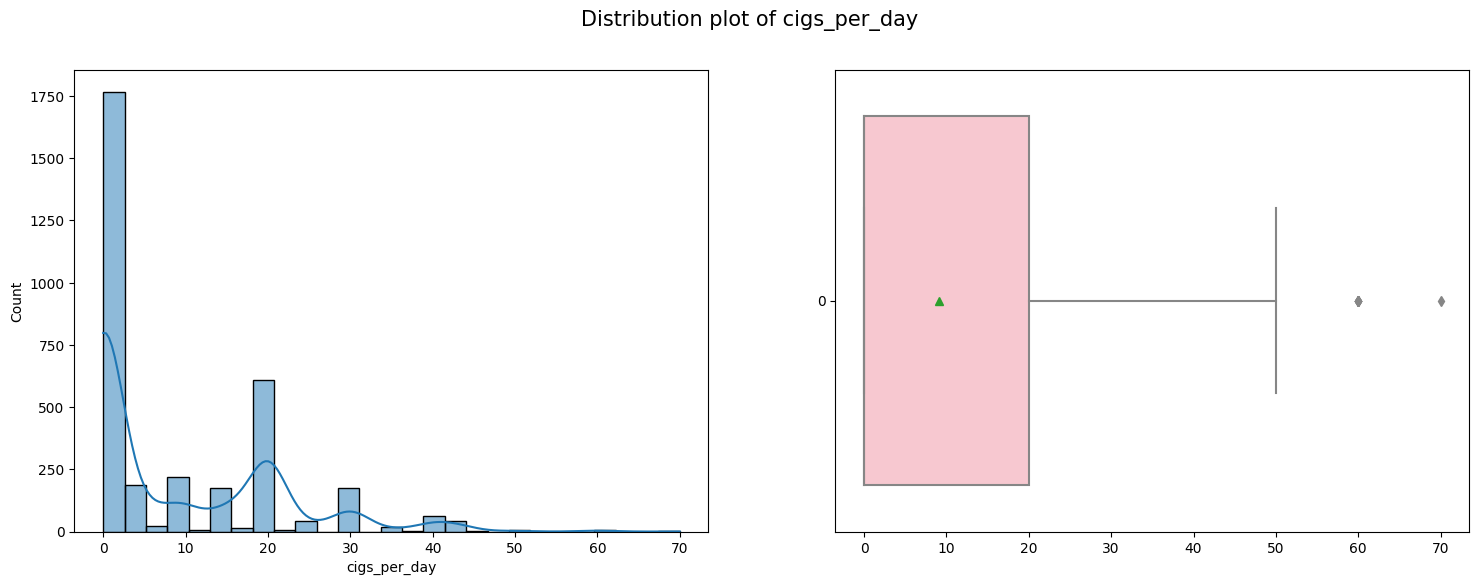

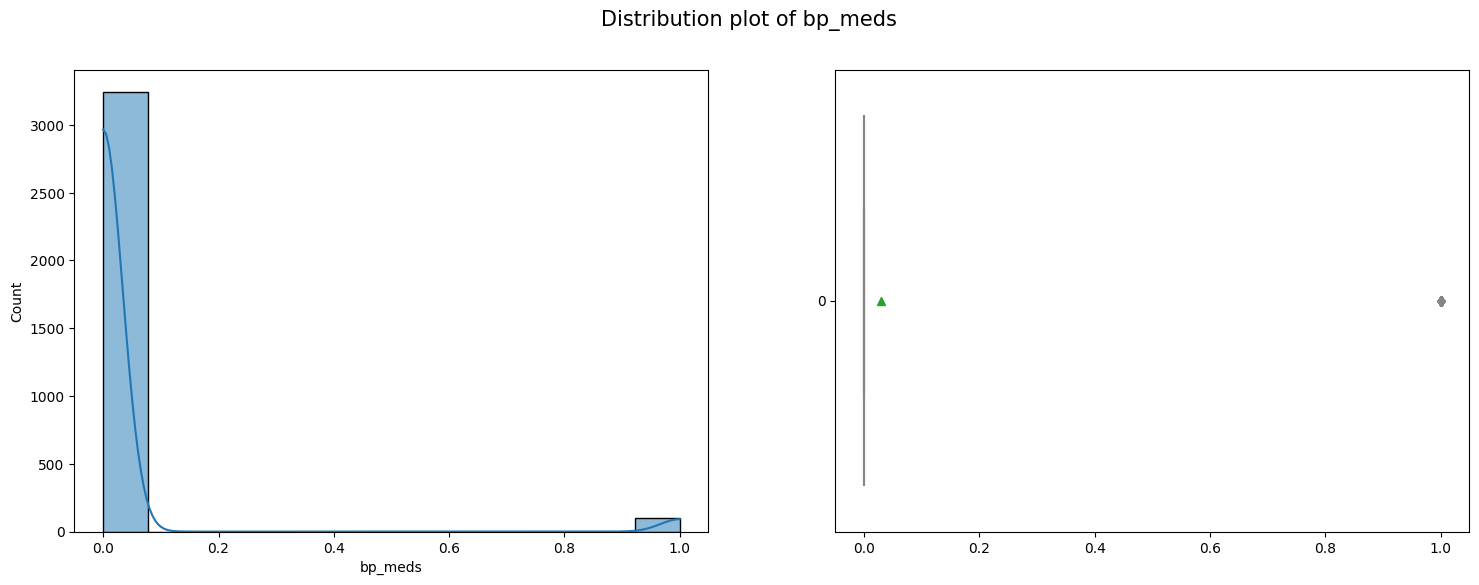

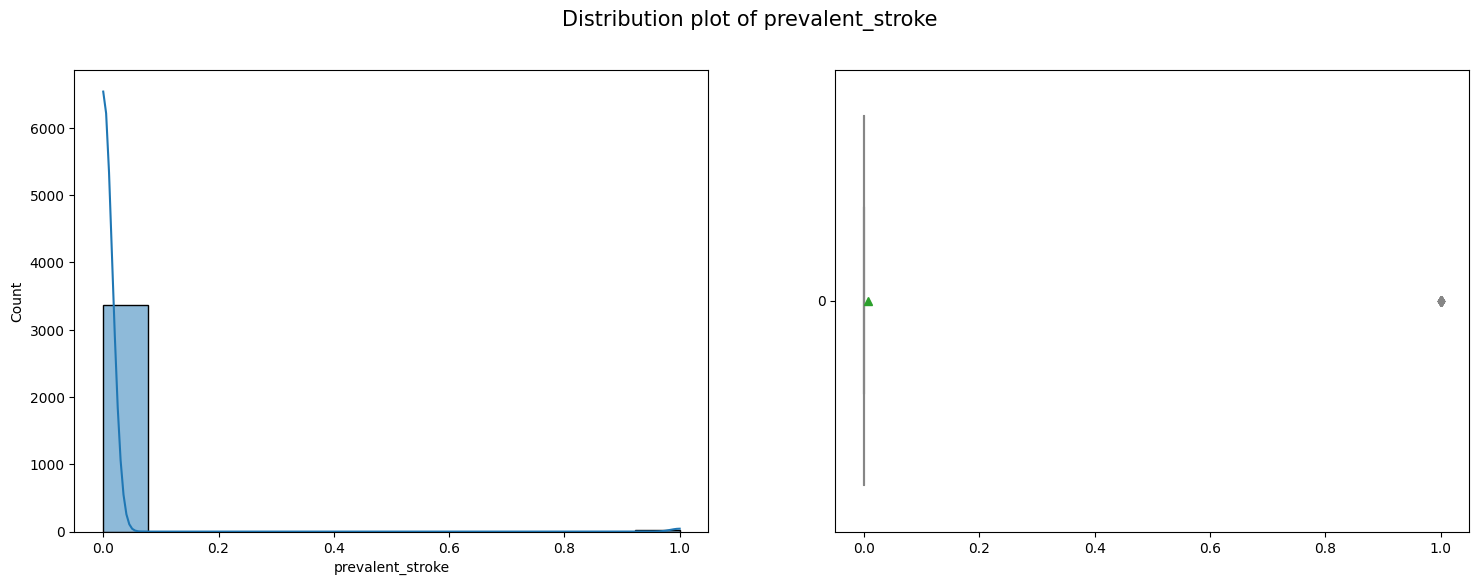

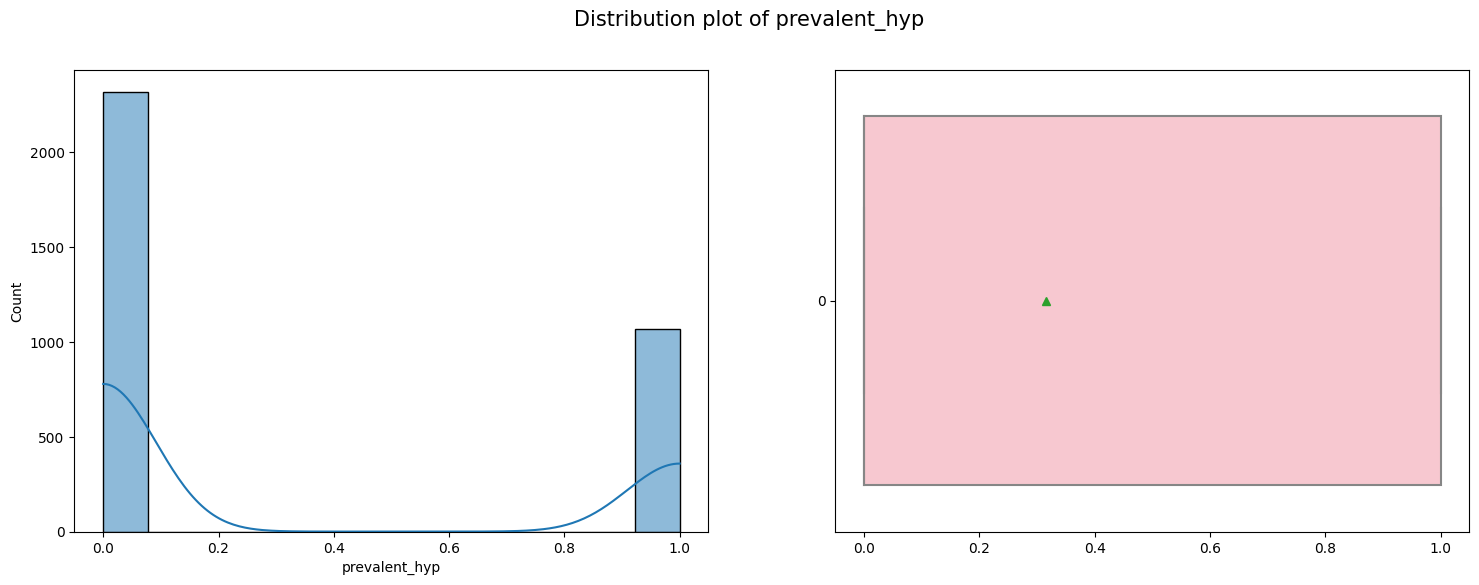

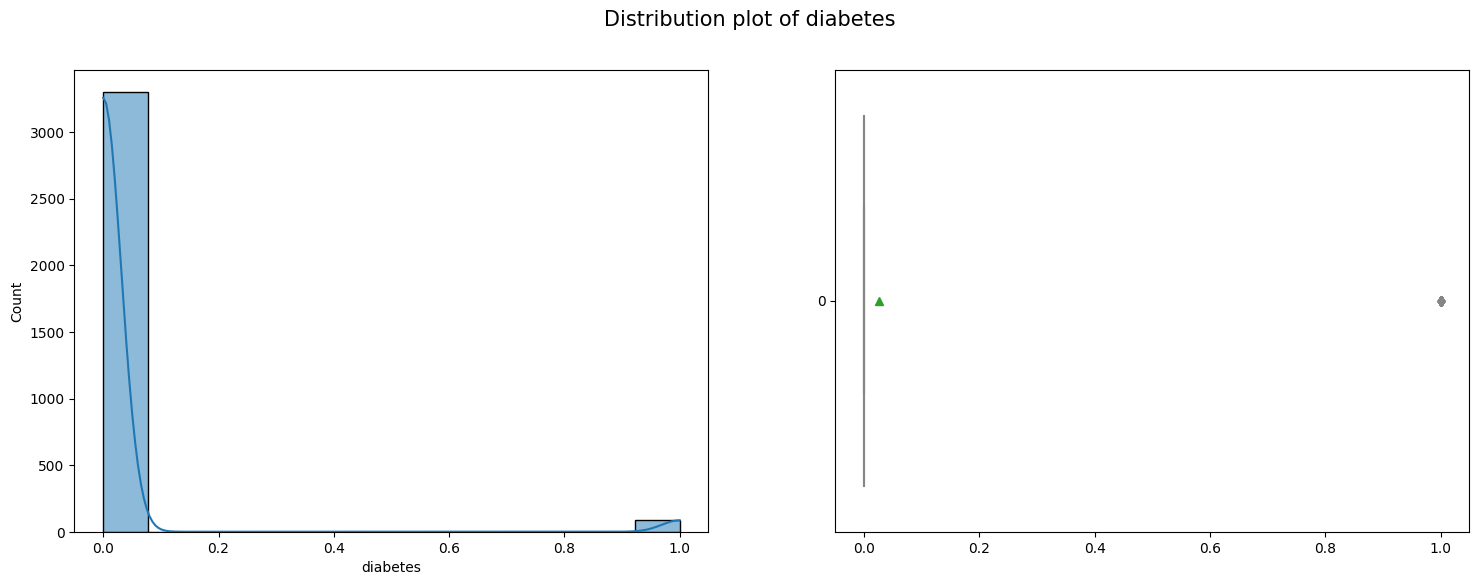

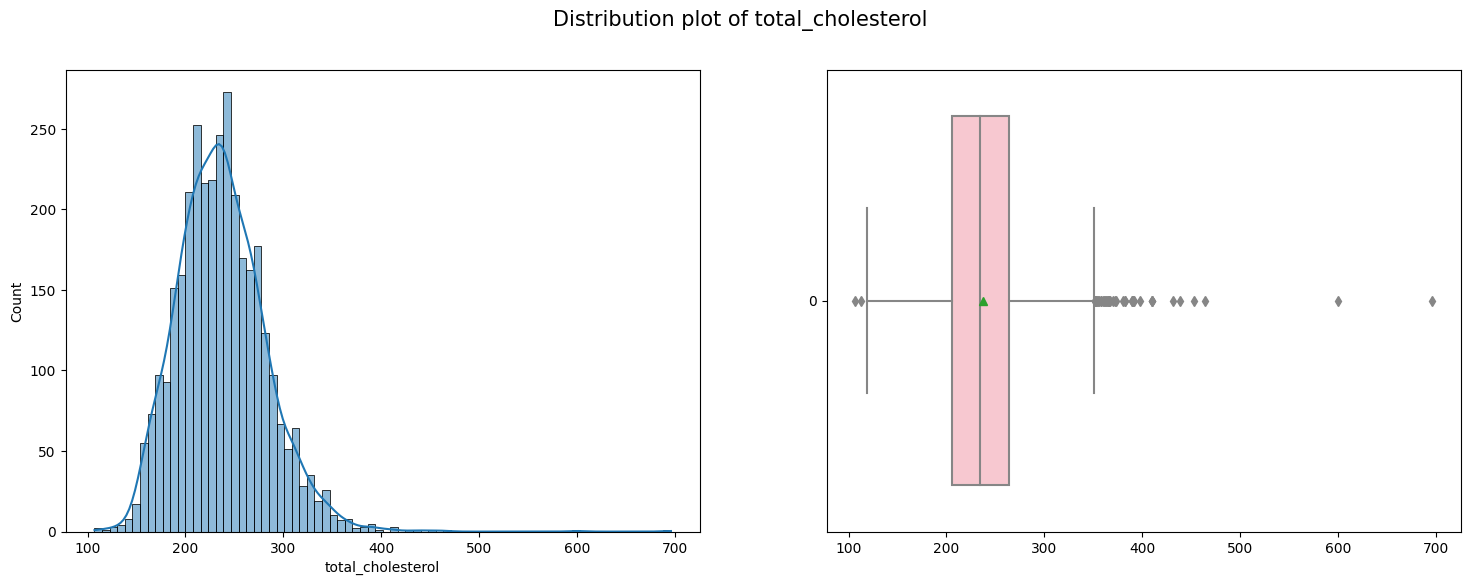

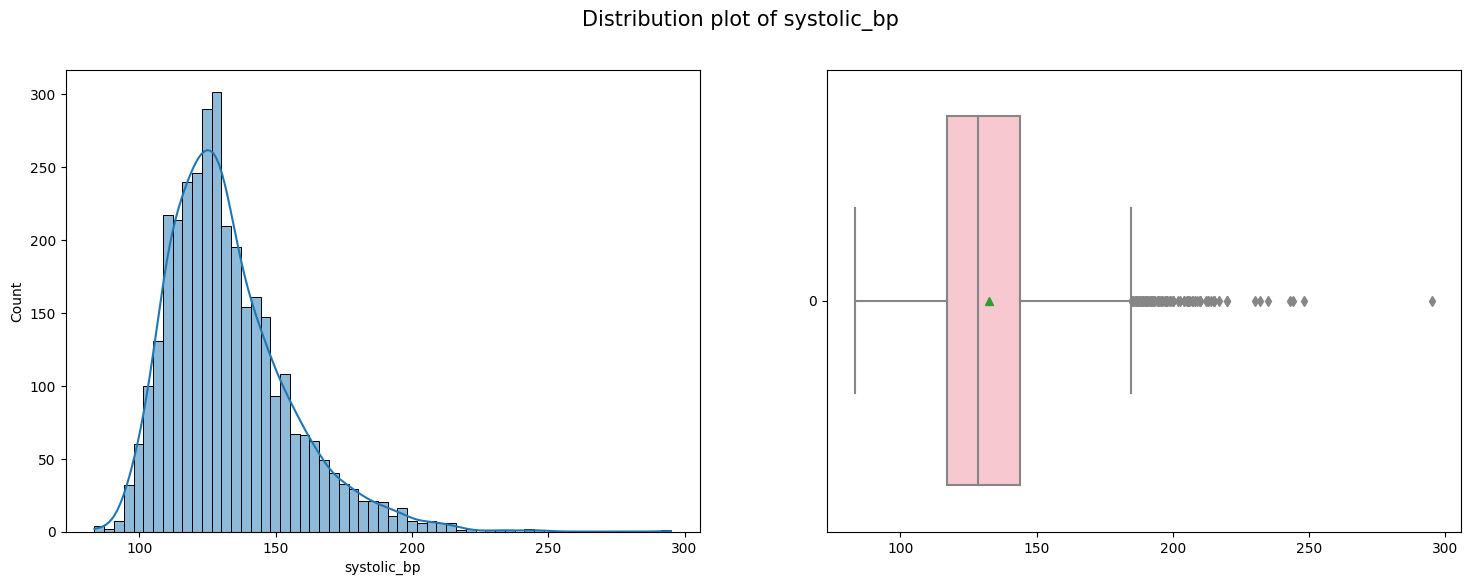

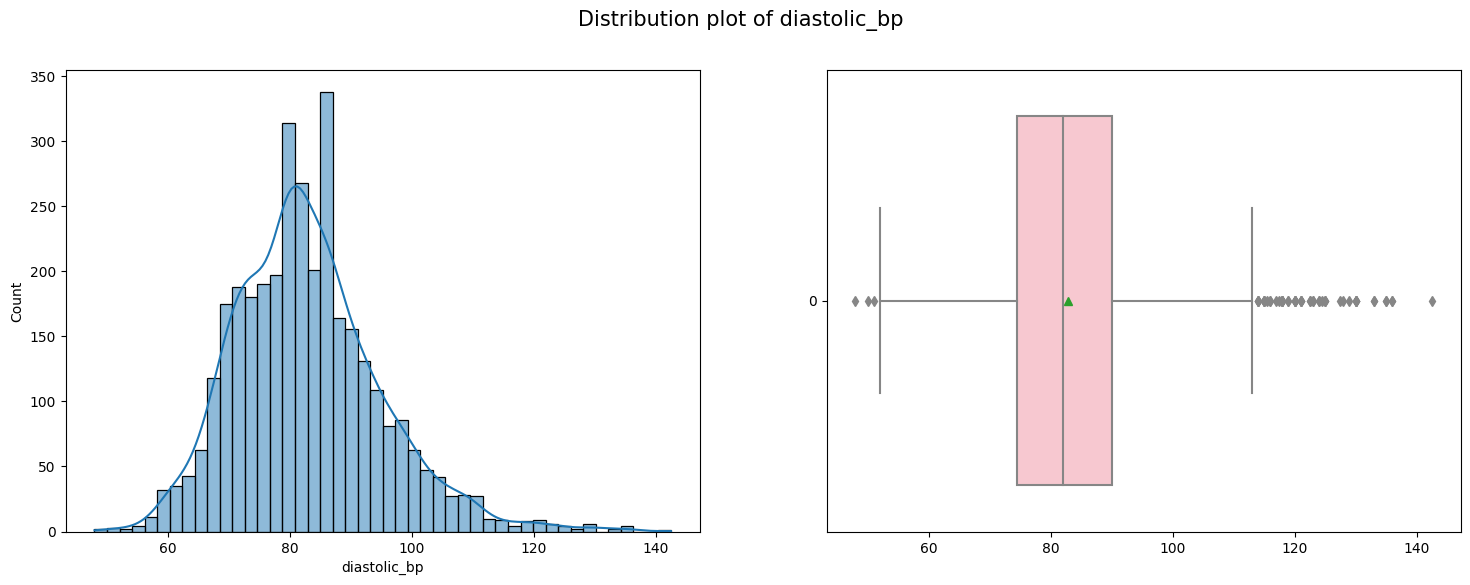

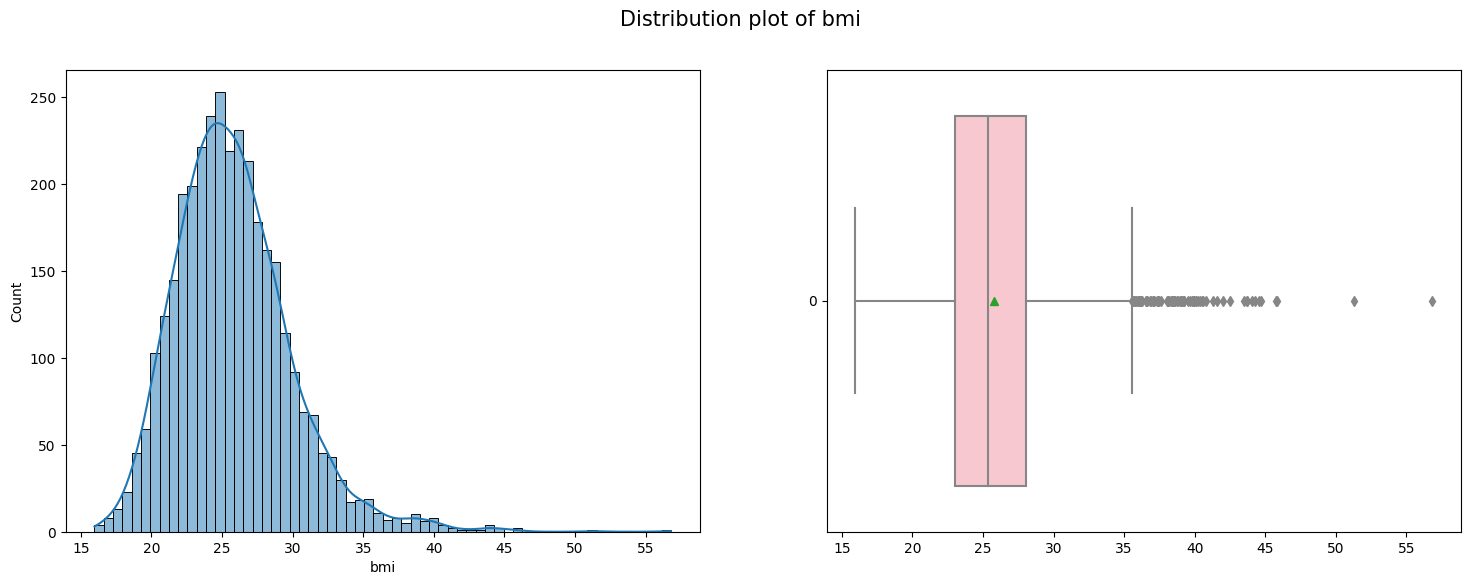

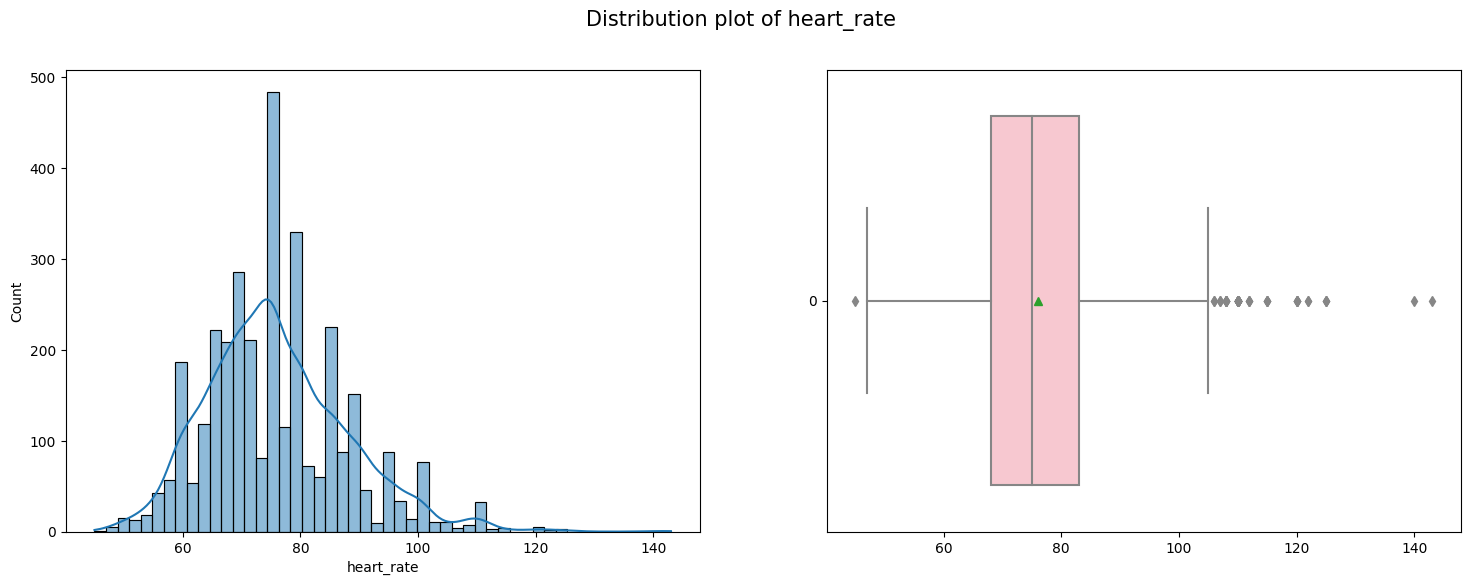

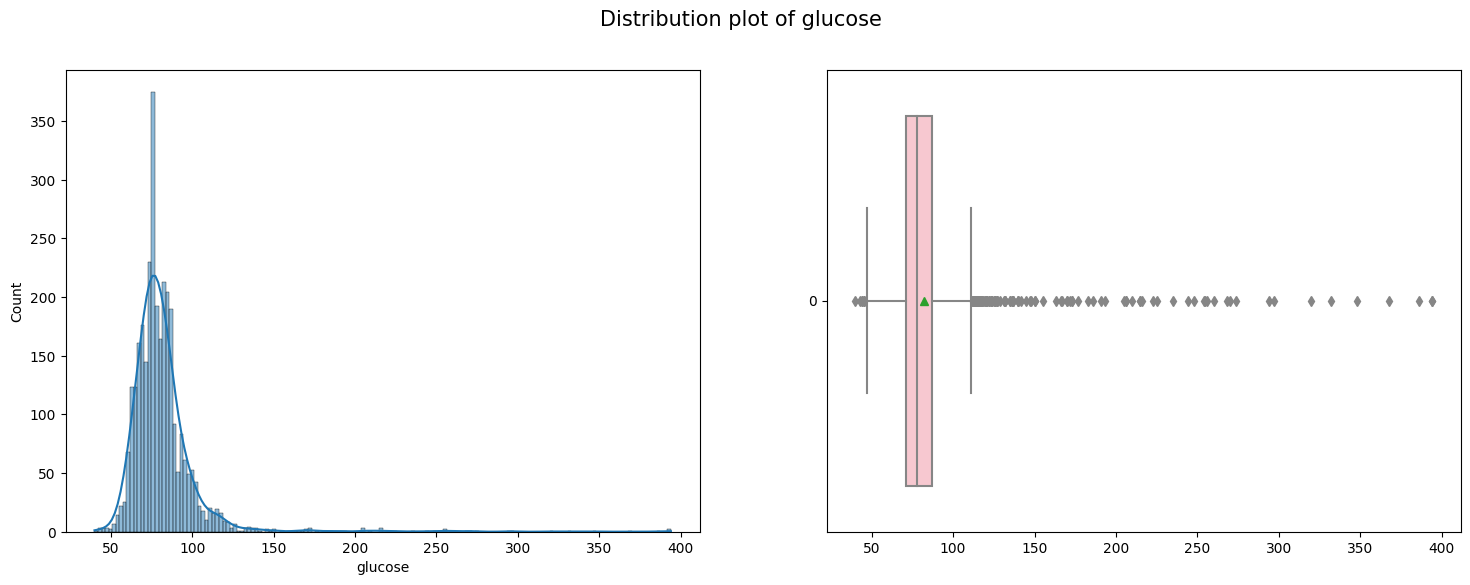

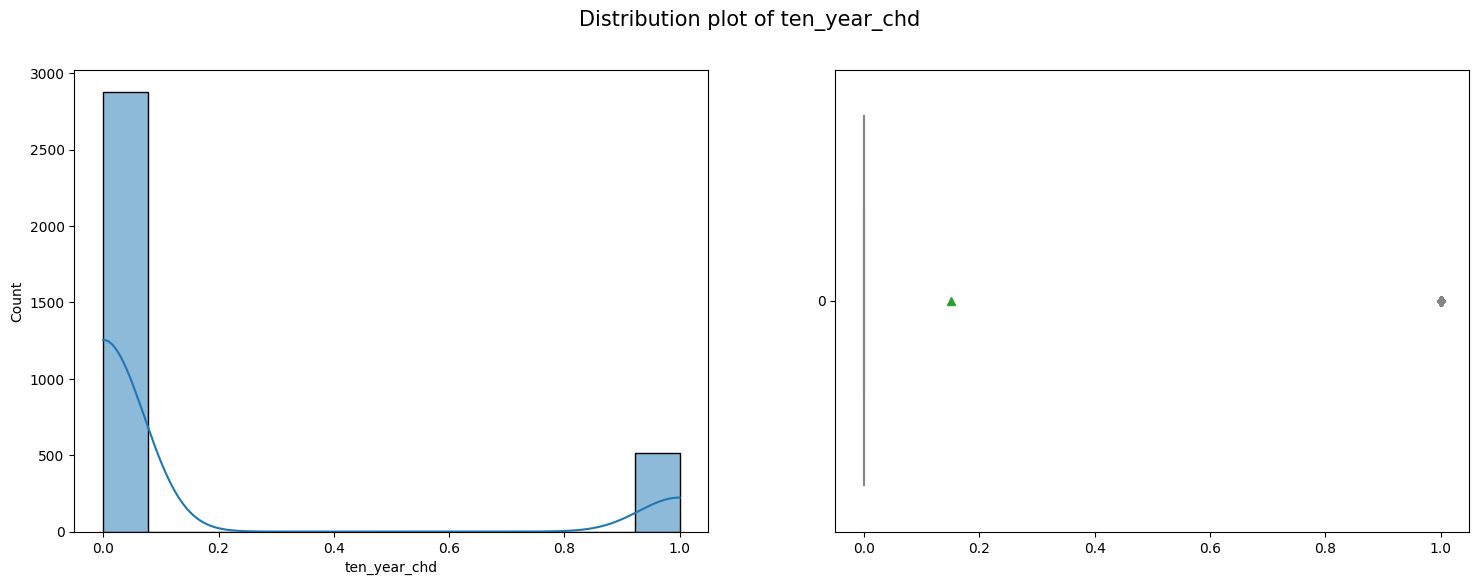

In [180]:
# Chart - 2 visualization code
for col in df.describe().columns: # Columns with numerical values
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
    sns.histplot(df[col], ax = axes[0],kde = True)  # used to see distrubution
    sns.boxplot(df[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 15)
    plt.show()

##### 1. Why did you pick the specific chart?

When we want to show how a single variable is spread out, we use histograms. Histograms are like bar charts but specifically designed to display the frequency or count of data points within specific ranges. They work best for continuous data, such as age, height, weight, or income. By using histograms, we can visualize the shape of the distribution, identify any skewness or outliers, and observe patterns or trends in the data.

On the other hand, when we want to compare the distributions of multiple datasets, we use box plots, also known as box-and-whisker plots. Box plots provide a concise summary of key statistical properties, like the spread and central tendency of the data. They help us understand the differences or similarities between the datasets and spot any potential outliers.

##### 2. What is/are the insight(s) found from the chart?

From the distribution we see that most of the columns are normally distributed, some of them are skewed and we can see some of the categorical columns also. In the box plot, we see some outliers also which we have to handle before model building.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Histogram and Box plot cannot give us whole information regarding data. It's done just to see the distribution of the column data over the dataset.

#### Chart - 3 Categorical variables vs Dependent variables

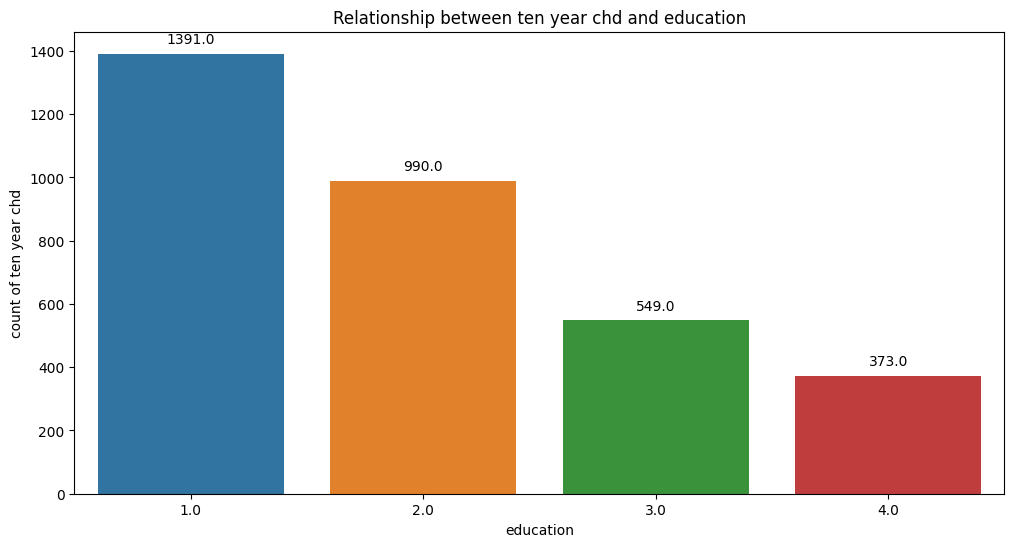

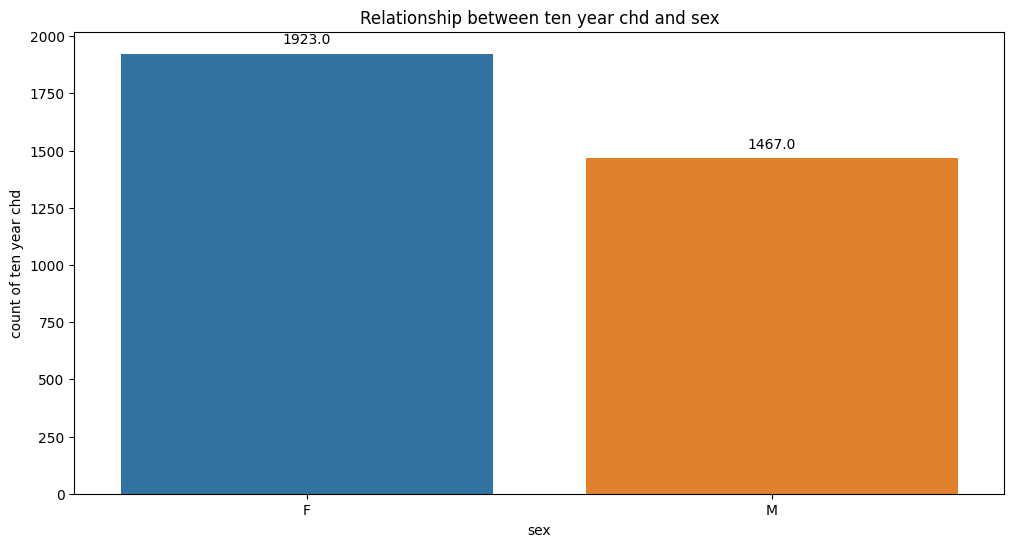

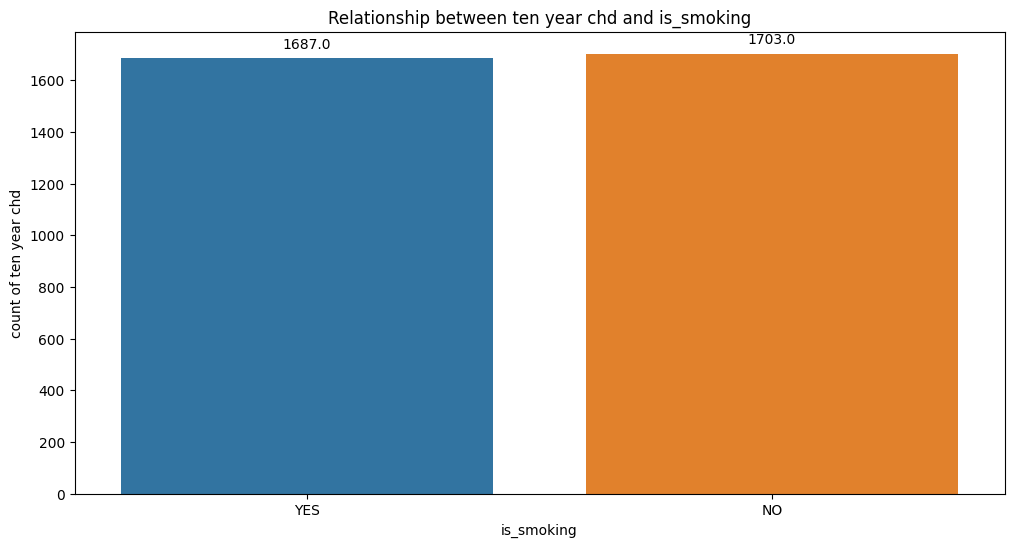

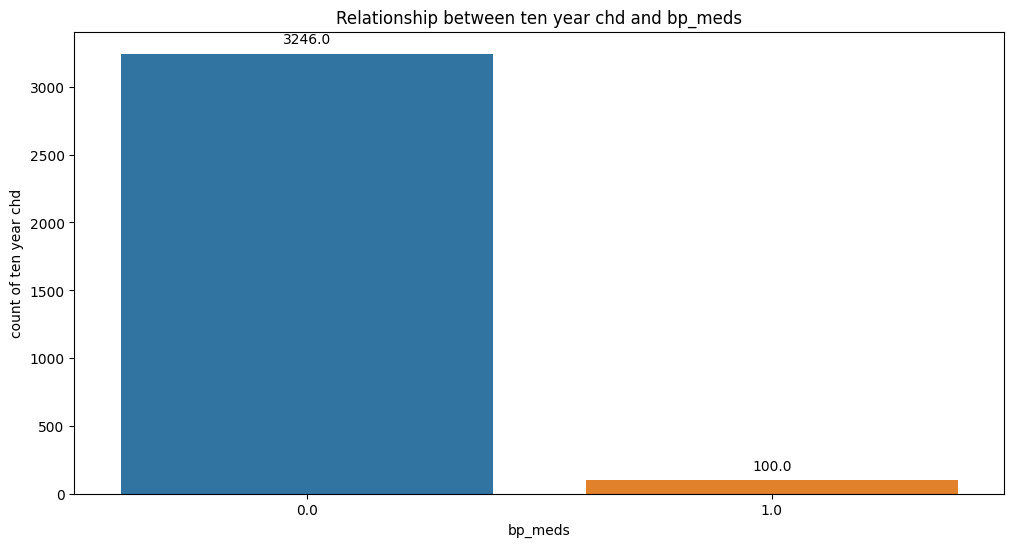

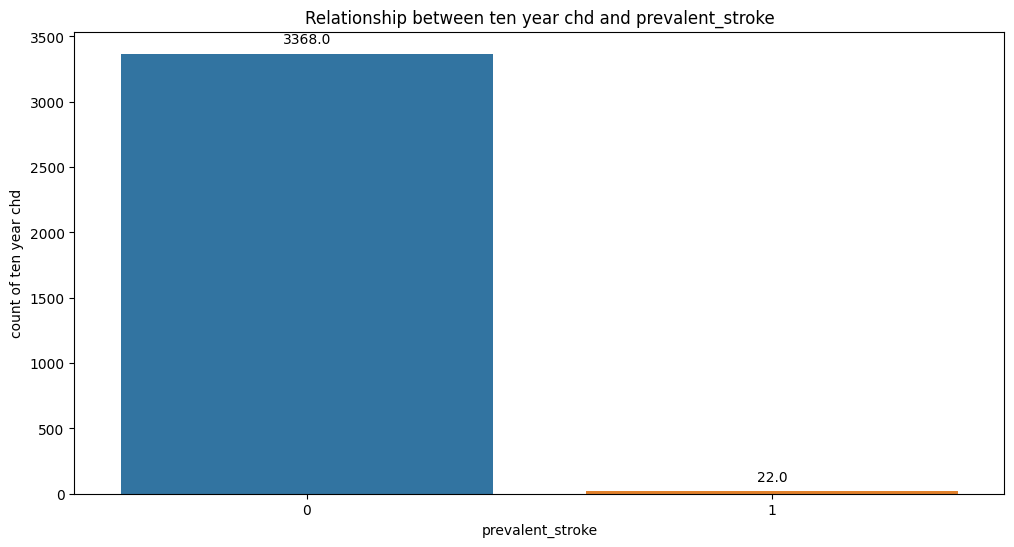

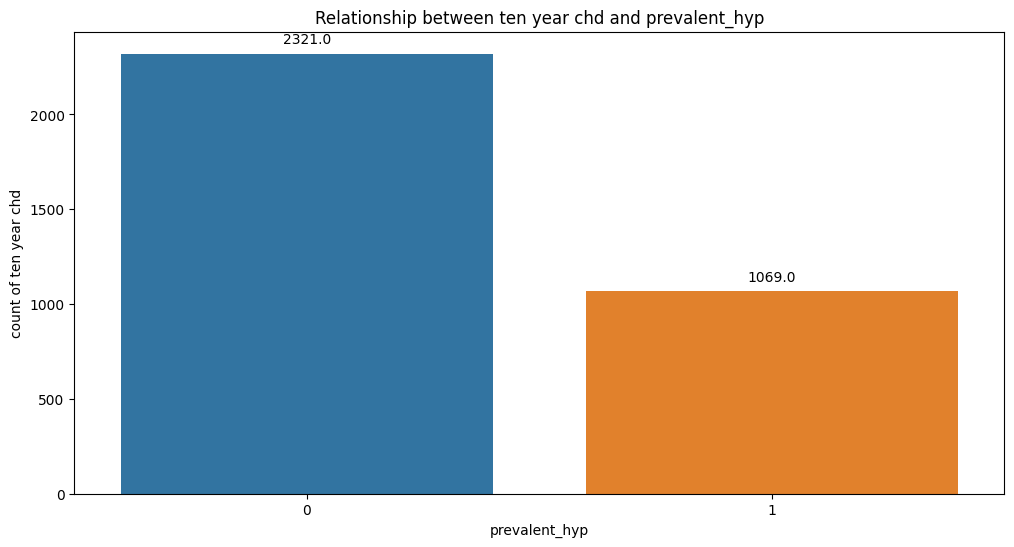

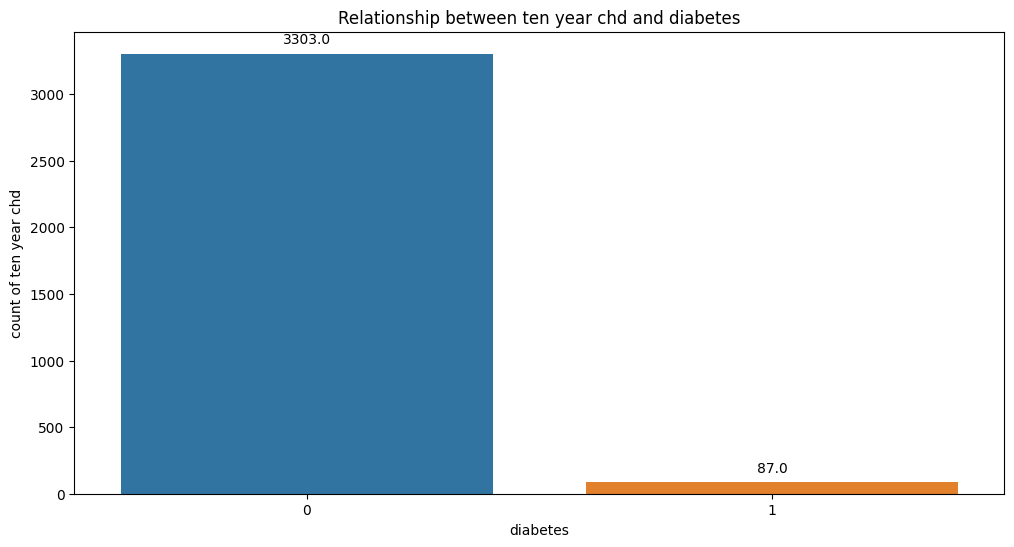

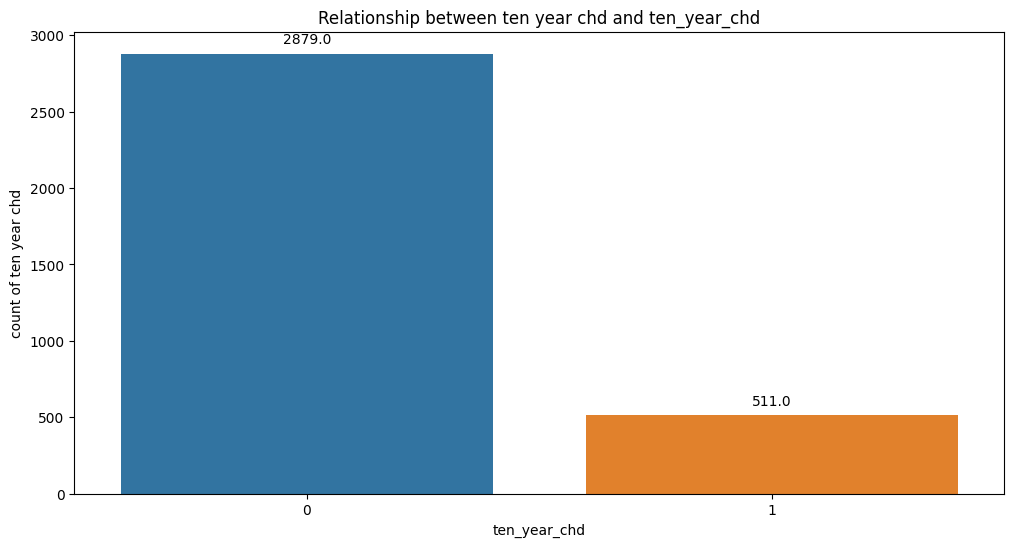

In [181]:
# Chart - 3 visualization code
for i in cat_col:
  plt.figure(figsize=(12,6))
  p = sns.countplot(x=i, data = df)
  plt.xlabel(i)
  plt.ylabel("count of ten year chd")
  plt.title('Relationship between ' + "ten year chd" + ' and ' + i)
  for i in p.patches:
    p.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10),
    textcoords = 'offset points')
  plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare different categories or groups of data by showing their size or frequency. They are helpful when you want to compare data across different categories quickly. In this case, we use a bar chart to display the average percentage of true churn for different states. This helps us see how churn rates vary across states and make informed decisions based on the visual information presented in the chart.

##### 2. What is/are the insight(s) found from the chart?

From the analysis of categorical columns in the dataset, we can observe the following distributions:

1. **Education Column:**
The category labeled as "1" has the highest count, followed by categories "2," "3," and "4." This suggests that the majority of patients fall into the "1" category for education, while fewer patients are in the higher education categories.

2. **Gender Distribution:**
The distribution of gender is not even, with a higher count for females. This indicates that there are more female patients in the dataset compared to male patients.

3. **Smoking Column:**
The distribution of the "is_smoking" column is balanced, meaning there are roughly an equal number of smokers and non-smokers in the dataset.
Imbalanced Columns:

4. Columns "bp_meds," "prevalent_stroke," "prevalent_hyp," and "diabetes" exhibit imbalanced distributions. This means that there are very few positive cases (where the condition is true) compared to the negative cases (where the condition is false) for these columns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 Continuous variables vs Dependent variable  

<Figure size 1200x1000 with 0 Axes>

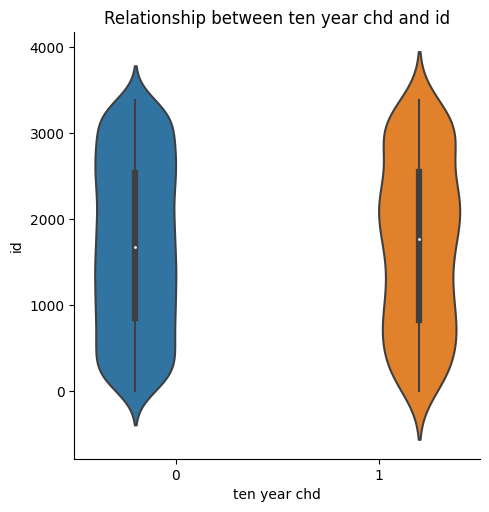

<Figure size 1200x1000 with 0 Axes>

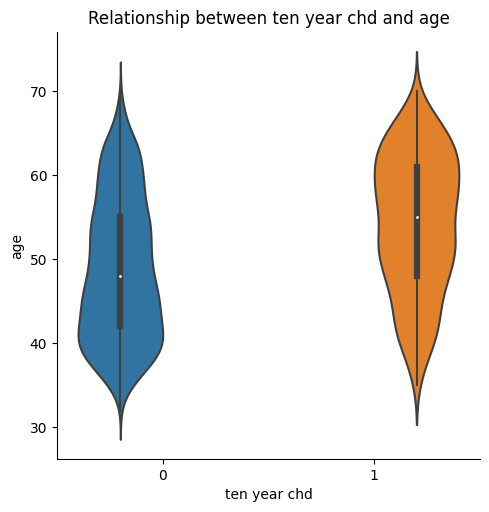

<Figure size 1200x1000 with 0 Axes>

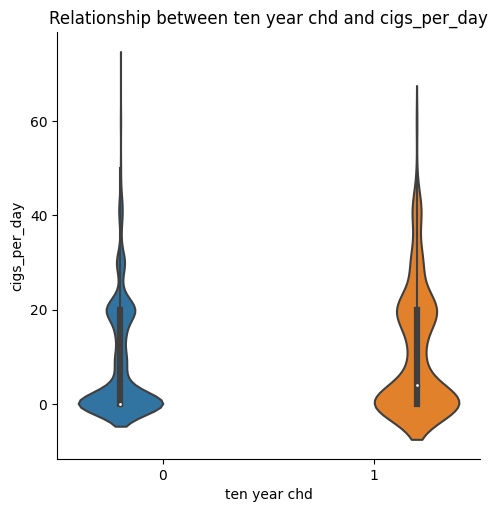

<Figure size 1200x1000 with 0 Axes>

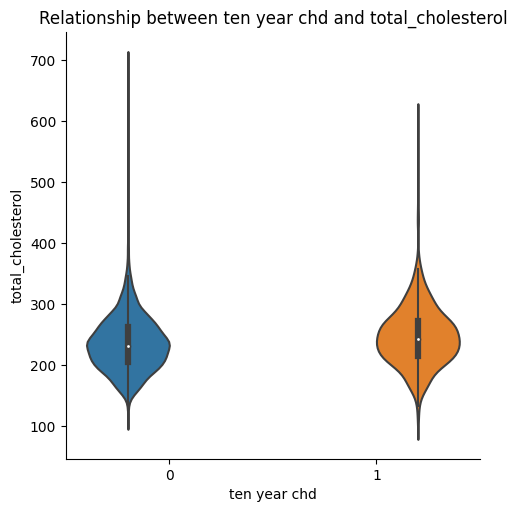

<Figure size 1200x1000 with 0 Axes>

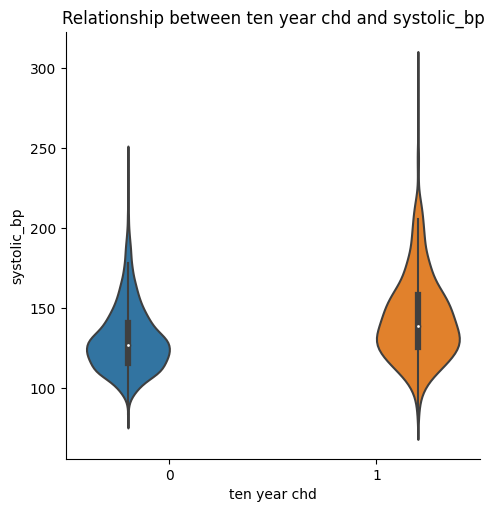

<Figure size 1200x1000 with 0 Axes>

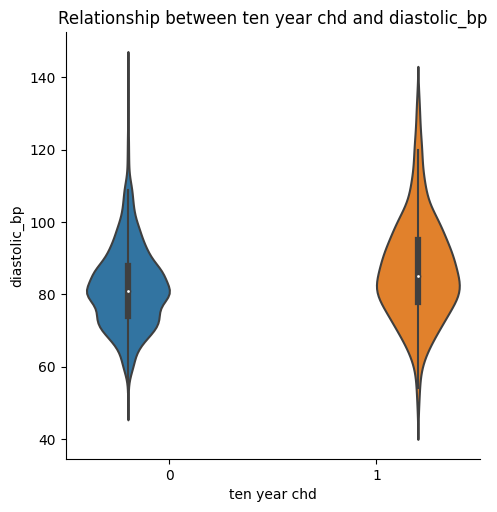

<Figure size 1200x1000 with 0 Axes>

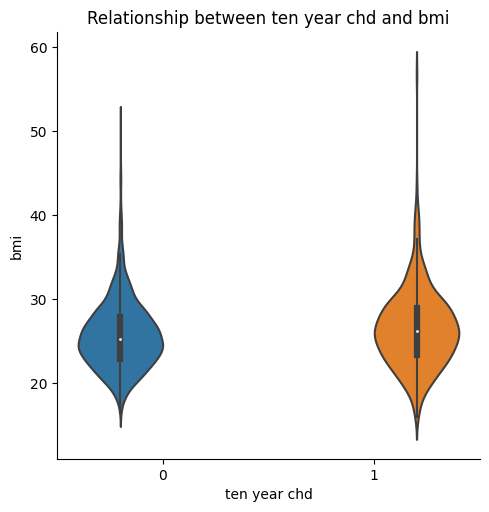

<Figure size 1200x1000 with 0 Axes>

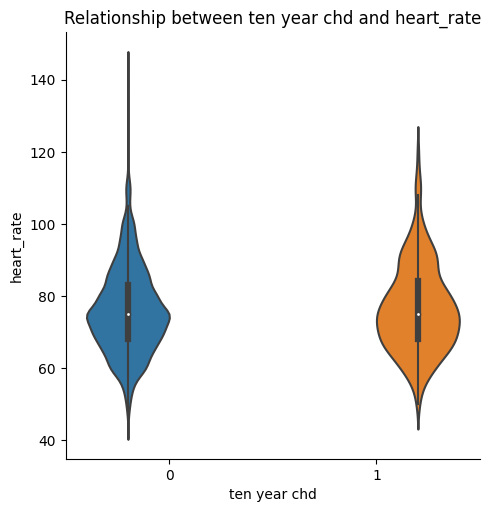

<Figure size 1200x1000 with 0 Axes>

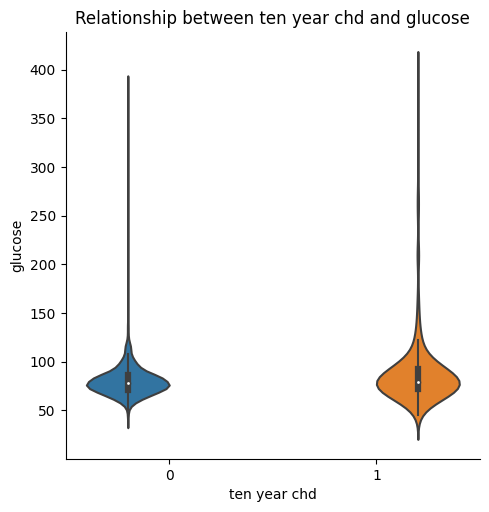

In [182]:
# Chart - 4 visualization code
for i in cont_col:
  plt.figure(figsize=(12,10))
  sns.catplot(data=df, x="ten_year_chd",y=i, hue="ten_year_chd", kind='violin')
  plt.ylabel(i)
  plt.xlabel("ten year chd")
  plt.title('Relationship between ' + "ten year chd" + ' and ' + i)
  plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<Figure size 1000x500 with 0 Axes>

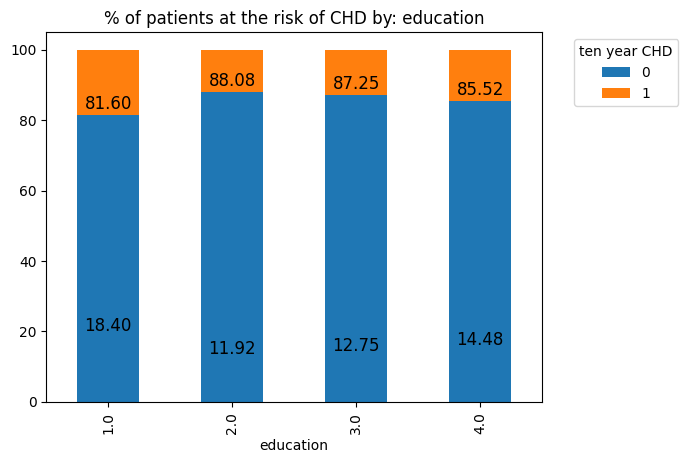

<Figure size 1000x500 with 0 Axes>

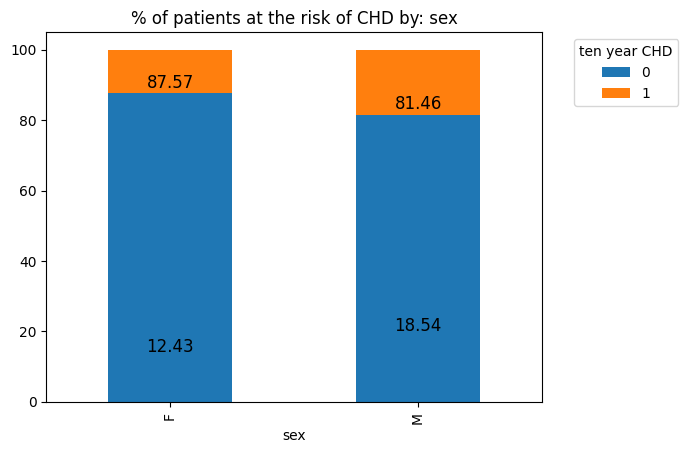

<Figure size 1000x500 with 0 Axes>

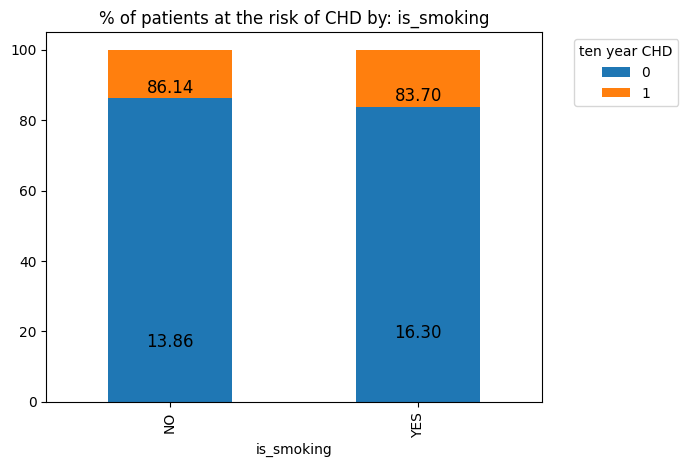

<Figure size 1000x500 with 0 Axes>

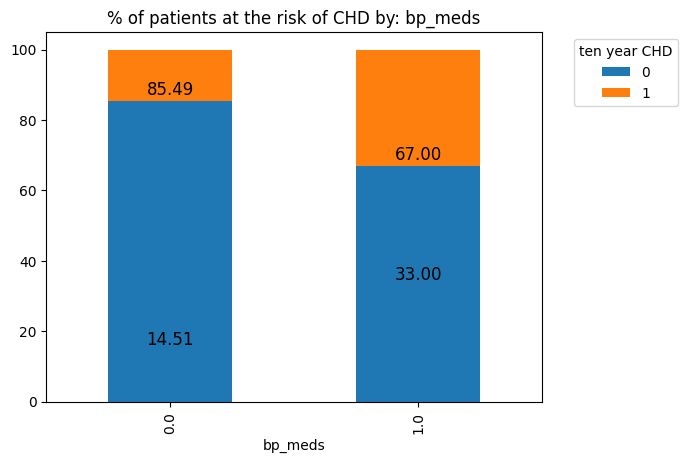

<Figure size 1000x500 with 0 Axes>

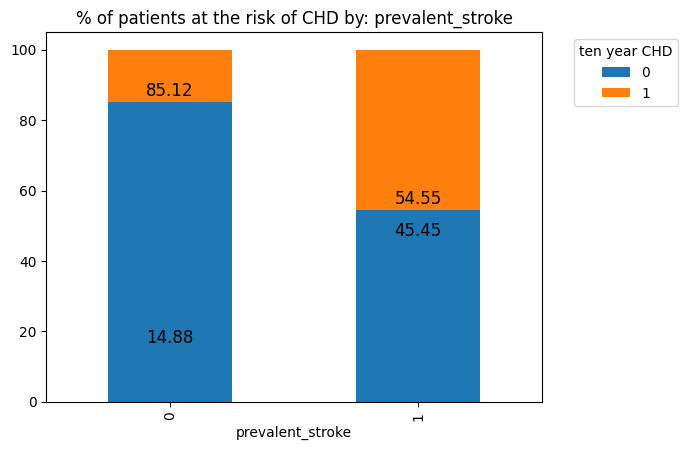

<Figure size 1000x500 with 0 Axes>

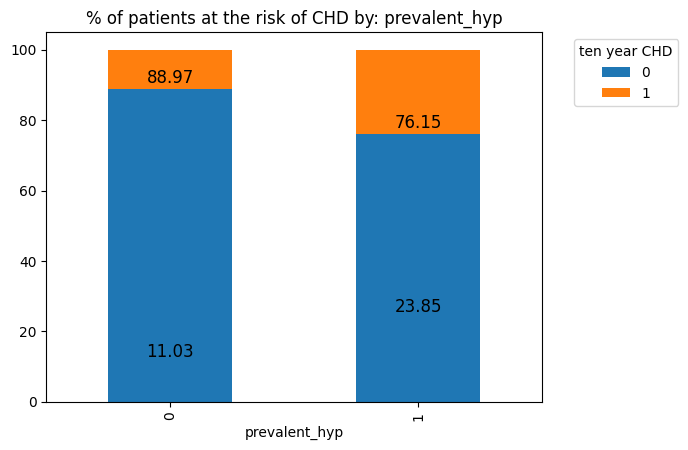

<Figure size 1000x500 with 0 Axes>

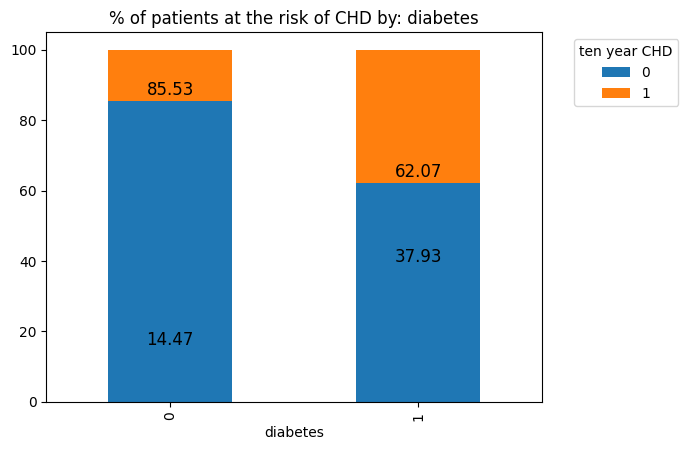

In [247]:
# Chart - 5 visualization code
for i in cat_col[:-1]:
    x_var, y_var = i, "ten_year_chd"
    plt.figure(figsize=(10,5))
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    plots = df_grouped.plot.bar(stacked=True)
    plt.legend(bbox_to_anchor=(1.05, 1),loc="upper left", title="ten year CHD")
    plt.title("% of patients at the risk of CHD by: "+i)
    for bar in plots.patches:
      plots.annotate(format(bar.get_height(),'.2f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center', size=12,
                 xytext=(0, 8), textcoords='offset points')
    plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 Correlation Heatmap visualization code

In [259]:
corr = df.corr()
corr

id       age  education  cigs_per_day   bp_meds  \
id                 1.000000  0.016759  -0.030573     -0.017249  0.007080   
age                0.016759  1.000000  -0.172559     -0.192335  0.124376   
education         -0.030573 -0.172559   1.000000      0.011126 -0.019920   
cigs_per_day      -0.017249 -0.192335   0.011126      1.000000 -0.037080   
bp_meds            0.007080  0.124376  -0.019920     -0.037080  1.000000   
prevalent_stroke  -0.038873  0.059038  -0.034194     -0.042057  0.119402   
prevalent_hyp      0.013236  0.308826  -0.084817     -0.079312  0.259548   
diabetes           0.003690  0.107875  -0.052013     -0.049016  0.071316   
total_cholesterol -0.019889  0.274028  -0.020781     -0.024703  0.083299   
systolic_bp        0.019676  0.404845  -0.137195     -0.100834  0.263729   
diastolic_bp       0.000832  0.221896  -0.060801     -0.068785  0.201217   
bmi                0.039849  0.138176  -0.133313     -0.100996  0.087932   
heart_rate         0.024684 -0.002596  -0.046980      0.066759  0.018107   
glucose            0.015517  0.116135  -0.038732     -0.068797  0.064490   
ten_year_chd       0.009866  0.224927  -0.052751      0.066778  0.088020   

                   prevalent_stroke  prevalent_hyp  diabetes  \
id                        -0.038873       0.013236  0.003690   
age                        0.059038       0.308826  0.107875   
education                 -0.034194      -0.084817 -0.052013   
cigs_per_day              -0.042057      -0.079312 -0.049016   
bp_meds                    0.119402       0.259548  0.071316   
prevalent_stroke           1.000000       0.071652  0.010115   
prevalent_hyp              0.071652       1.000000  0.082565   
diabetes                   0.010115       0.082565  1.000000   
total_cholesterol         -0.010832       0.159680  0.059080   
systolic_bp                0.057568       0.699285  0.124011   
diastolic_bp               0.047235       0.612897  0.061165   
bmi                        0.018602       0.300464  0.089112   
heart_rate                -0.019184       0.150815  0.039742   
glucose                    0.023607       0.086658  0.620211   
ten_year_chd               0.068627       0.166544  0.103681   

                   total_cholesterol  systolic_bp  diastolic_bp       bmi  \
id                         -0.019889     0.019676      0.000832  0.039849   
age                         0.274028     0.404845      0.221896  0.138176   
education                  -0.020781    -0.137195     -0.060801 -0.133313   
cigs_per_day               -0.024703    -0.100834     -0.068785 -0.100996   
bp_meds                     0.083299     0.263729      0.201217  0.087932   
prevalent_stroke           -0.010832     0.057568      0.047235  0.018602   
prevalent_hyp               0.159680     0.699285      0.612897  0.300464   
diabetes                    0.059080     0.124011      0.061165  0.089112   
total_cholesterol           1.000000     0.199159      0.154974  0.114305   
systolic_bp                 0.199159     1.000000      0.781908  0.333864   
diastolic_bp                0.154974     0.781908      1.000000  0.380498   
bmi                         0.114305     0.333864      0.380498  1.000000   
heart_rate                  0.087458     0.178262      0.174904  0.069655   
glucose                     0.062723     0.143090      0.071499  0.093454   
ten_year_chd                0.094306     0.212703      0.135979  0.066947   

                   heart_rate   glucose  ten_year_chd  
id                   0.024684  0.015517      0.009866  
age                 -0.002596  0.116135      0.224927  
education           -0.046980 -0.038732     -0.052751  
cigs_per_day         0.066759 -0.068797      0.066778  
bp_meds              0.018107  0.064490      0.088020  
prevalent_stroke    -0.019184  0.023607      0.068627  
prevalent_hyp        0.150815  0.086658      0.166544  
diabetes             0.039742  0.620211      0.103681  
total_cholesterol    0.087458  0.062723      0

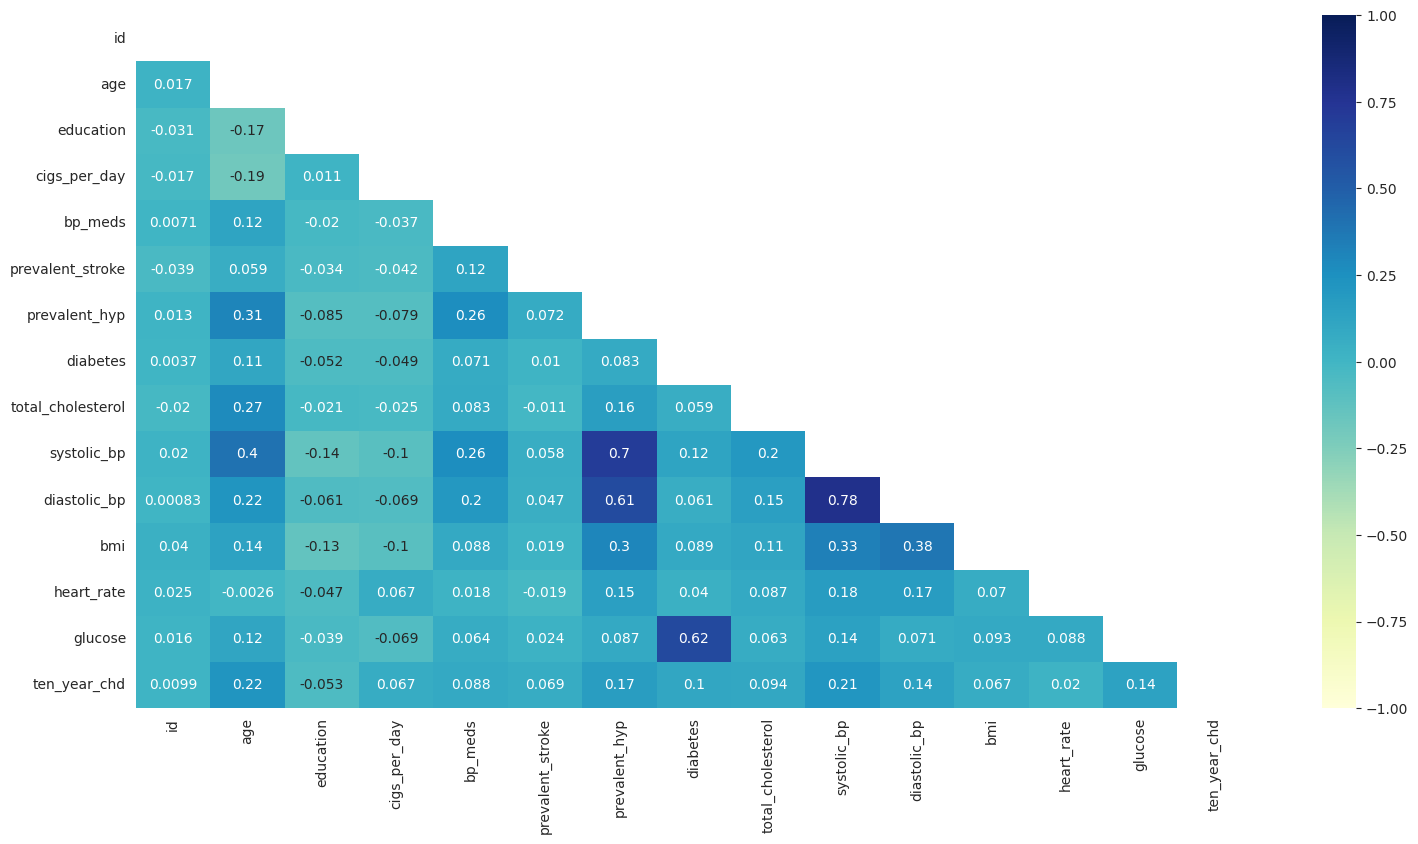

In [257]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 Pair Plot

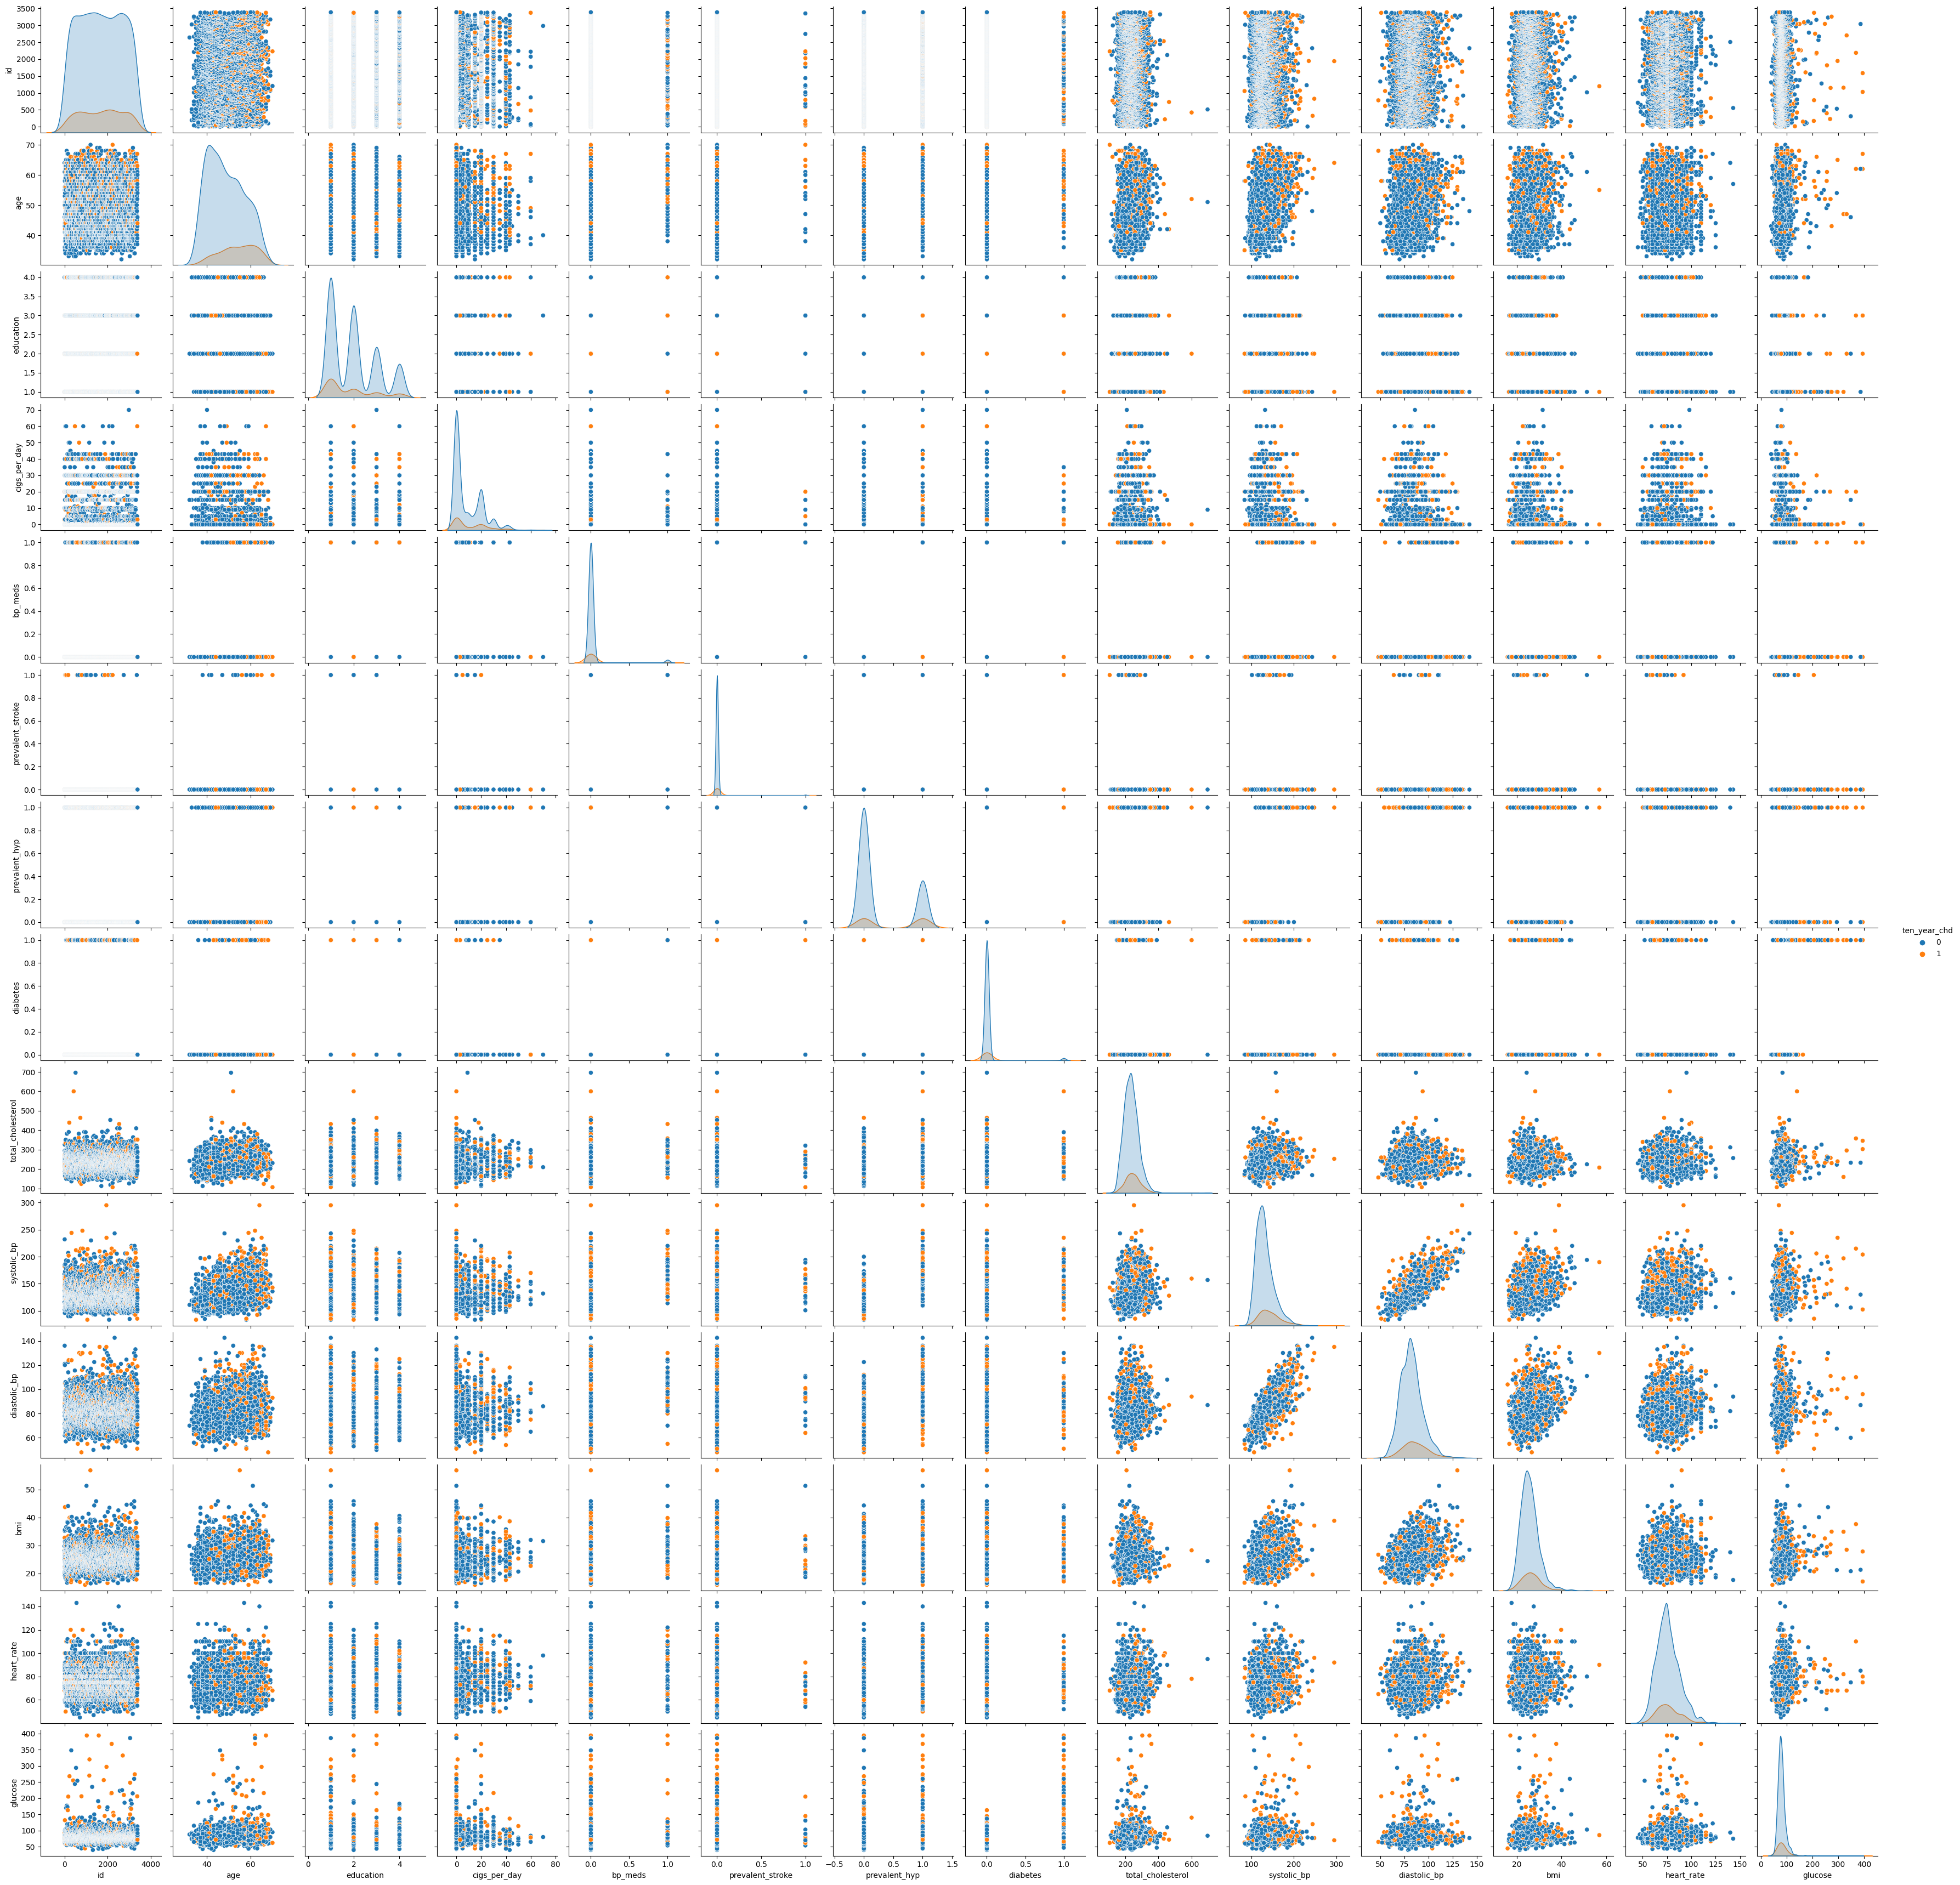

In [261]:
# Chart - 7 visualization code
sns.pairplot(df, hue="ten_year_chd")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [186]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [187]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [188]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [189]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [190]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [191]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [192]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [193]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no association between education level and CHD outcome.

Alternate hypothesis: There is an association between education level and CHD outcome.

#### 2. Perform an appropriate statistical test.

In [262]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df['education'], df['ten_year_chd'])
print(contingency_table)

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print p-value
print(f'p-value: {p}')


ten_year_chd     0    1
education              
1.0           1135  256
2.0            872  118
3.0            479   70
4.0            319   54
p-value: 6.038646749234552e-05


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [263]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df['cigs_per_day'], df['ten_year_chd'])
print(contingency_table)

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print p-value
print(f'p-value: {p}')


ten_year_chd     0    1
cigs_per_day           
0.0           1467  236
1.0             41    7
2.0             14    3
3.0             70    9
4.0              7    0
5.0             91   12
6.0             11    3
7.0              5    3
8.0             10    0
9.0             95    9
10.0            89   17
11.0             3    1
12.0             2    1
13.0             3    0
14.0             1    0
15.0           146   26
16.0             2    0
17.0             5    0
18.0             4    3
19.0             2    0
20.0           503  103
23.0             4    1
25.0            34   10
30.0           145   31
35.0            13    4
38.0             1    0
40.0            45   17
43.0            31   11
45.0             2    0
50.0             5    1
60.0             6    2
70.0             1    0
p-value: 0.13373338531562284


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [196]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [197]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [198]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [199]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [200]:
# Expand Contraction

#### 2. Lower Casing

In [201]:
# Lower Casing

#### 3. Removing Punctuations

In [202]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [203]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [204]:
# Remove Stopwords

In [205]:
# Remove White spaces

#### 6. Rephrase Text

In [206]:
# Rephrase Text

#### 7. Tokenization

In [207]:
# Tokenization

#### 8. Text Normalization

In [208]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [209]:
# POS Taging

#### 10. Text Vectorization

In [210]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [211]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [212]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [213]:
# Transform Your data

### 6. Data Scaling

In [214]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [215]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [216]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [217]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [218]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [219]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [220]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [221]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [222]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [223]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [224]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [225]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [226]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [227]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***